In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [93]:
df=pd.read_csv(r'D:\linear-regression\dataset\NFLX.csv')

In [94]:
df.shape

(4581, 7)

In [95]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [96]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [97]:
df['Date']=pd.to_datetime(df['Date'])

# First 100 days moving average

In [98]:
MA100=df.Close.rolling(100).mean()
MA100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4576    425.4776
4577    426.6327
4578    428.0258
4579    429.2733
4580    430.7603
Name: Close, Length: 4581, dtype: float64

Text(0.5, 1.0, 'Closing Price vs. 100-Day Moving Average')

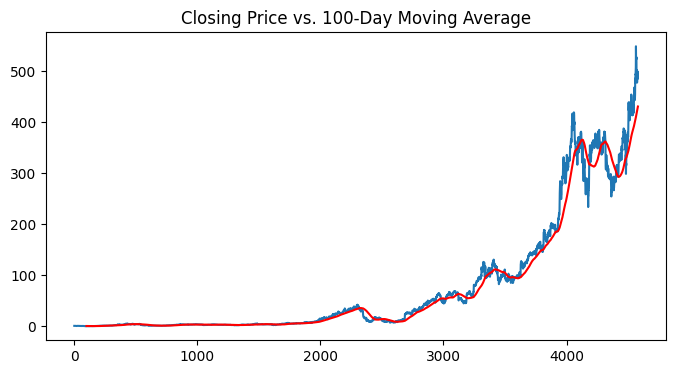

In [99]:
plt.figure(figsize=(8,4))
plt.plot(df['Close'])
plt.plot(MA100, 'r')
plt.title('Closing Price vs. 100-Day Moving Average')


# 200 days moving average

In [100]:
MA200=df.Close.rolling(200).mean()
MA200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
4576    375.39255
4577    376.40030
4578    377.40165
4579    378.42480
4580    379.48650
Name: Close, Length: 4581, dtype: float64

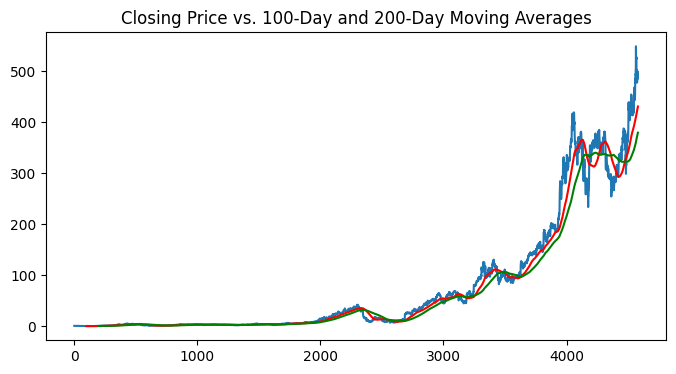

In [101]:
plt.figure(figsize=(8,4))
plt.plot(df['Close'])
plt.plot(MA100, 'r')
plt.plot(MA200, 'g')
plt.title('Closing Price vs. 100-Day and 200-Day Moving Averages')
plt.show()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4581 non-null   datetime64[ns]
 1   Open       4581 non-null   float64       
 2   High       4581 non-null   float64       
 3   Low        4581 non-null   float64       
 4   Close      4581 non-null   float64       
 5   Adj Close  4581 non-null   float64       
 6   Volume     4581 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 250.7 KB


In [103]:
df.duplicated().sum()

np.int64(0)

In [104]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

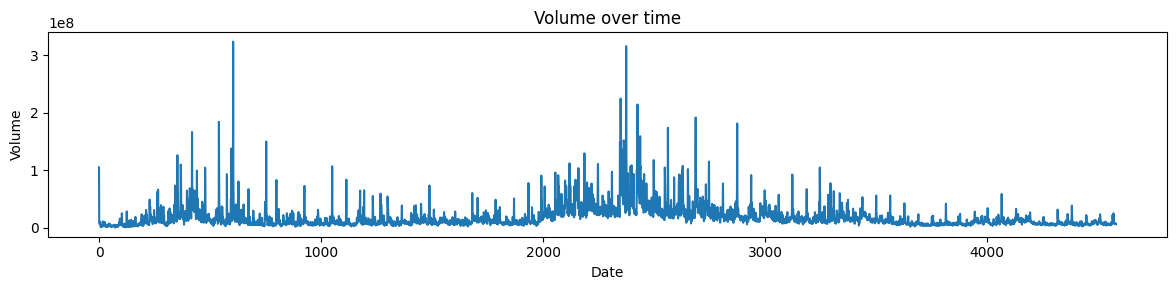

In [105]:
plt.figure(figsize=(12,3))
plt.plot(df.index, df['Volume'])
plt.title('Volume over time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

In [106]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [107]:
print(data_testing.shape)
print(data_training.shape)

(1375, 1)
(3206, 1)


In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01196605],
       [0.01216323],
       [0.01139525],
       ...,
       [0.94258798],
       [0.96203666],
       [0.97004864]])

In [109]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(3106, 100, 1)

In [110]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [111]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.summary()

d:\DAMP\python\Library\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - loss: 0.0419
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 0.0050
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.0044
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 0.0047
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 0.0039
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0036
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.0033
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0029
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.0036
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0031
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 0.0033
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 0.0026
Epoch 13/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0026
Epoch 14/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0028
Epoch 15/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0025

In [113]:
model.save('keras_model.h5')

In [114]:
past_100_days=data_training.tail(100)


In [115]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [116]:
final_df

,Close
0,64.365715
1,63.355713
2,64.107140
3,64.222855
4,64.454285
...,...
1470,488.510010
1471,484.480011
1472,485.799988
1473,488.880005


In [117]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.03805179],
       [0.03604593],
       [0.03753826],
       ...,
       [0.87502093],
       [0.88113785],
       [0.90048149]])

In [118]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
x_test.shape

(1375, 100, 1)

In [119]:
y_predicted=model.predict(x_test)
y_predicted

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step


array([[0.06195073],
       [0.06275055],
       [0.06354418],
       ...,
       [0.8408255 ],
       [0.8426308 ],
       [0.84555364]], dtype=float32)

In [120]:
y_predicted.shape

(1375, 1)

In [121]:
scaler.scale_

array([0.001986])

In [122]:
scale_factor=1/scaler.scale_[0]
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

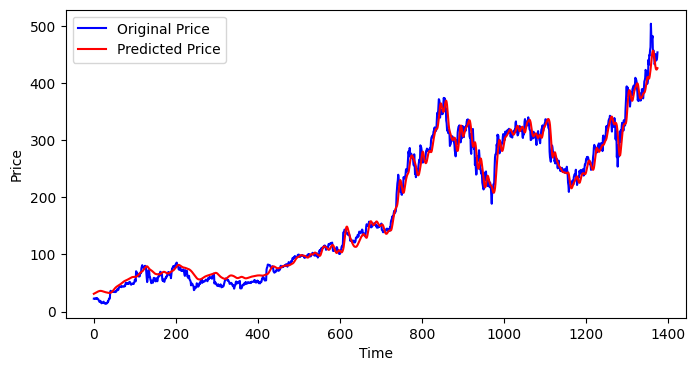

In [123]:
plt.figure(figsize=(8,4))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [125]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
print(f"Mean Absolute Error: {mae}")
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test, y_predicted)
print(f"R-squared: {r2}")

Mean Absolute Error: 10.417258748237447
Mean Squared Error: 195.94796735757683
Root Mean Squared Error: 13.998141567993118
R-squared: 0.9863829980082108
